### Gambler's Problem definition: 
(Defined in Chapter 4 of [Introduction to Reinforcement Learning](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf))

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars.

> This problem can be formulated as an undiscounted, episodic, finite MDP. The
state is the gambler's capital, `s` = {1,2,....99} and the actions are stakes,
`a` = {1,2,...min(s,100-s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1. 


> The `state-value` function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let `p_h` denote the probability of the coin coming up heads. If `p_h` is known, then the entire problem is known and it can be solved, for instance, by value iteration. 

We have derived the optimal state-value function values, by choosing the policy as the policy of selecting the best action in terms of maximum expected rewards. The state-value functions are approximated using the Bellman equations. 

The policy chosen is optimal, but not unique. In fact, there is a whole family of optimal policies, all corresponding to ties for the argmax action selection with respect to the optimal value function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# This function calculates the expected returns by taking action a and state s. It calculates this for all the possible actions given a state. 

def expected_action_value(s, reward, value, p_h = 0.25, gamma = 0.01, g=100):

  max_stake = min(s,g-s)    # Number of possible stakes given Gambler's captial s: [1,max_stake]. 
  A = np.zeros(g+1)         # Value of taking action(stake) while in state s(capital)

  for a in range(1,max_stake+1):
    A[a] = p_h*(reward[s+a] + gamma*value[s+a]) + (1 - p_h)*(reward[s-a] + gamma*value[s-a])
    # Only two possible next states/transitions (loss or gain) for a particular capital and each stake
    # Expected reward of taking action a in state is calculated using Bellman equation

  return A

In [0]:
def value_iteration(p_h, gamma, theta,g):

  # Number of possible states (capital of Gambler) are g: [0,1,2...g]

  reward = np.zeros(g+1)  # Reward at each state
  reward[g] = 1          # Setting the reward of capital g as 1, rest as 0
  value = np.zeros(g+1)    # Value of each state

  while True:
    delta = 0
    for s in range(1,g):
      A = expected_action_value(s, reward, value, p_h, gamma,g)   # Calculating value of each action given state s
      max_action_value = np.max(A)                                # Greedy policy of selecting the action with max expected return
      delta = max(delta, np.abs(value[s]-max_action_value))       # Delta (Max difference in state value) across all states
      value[s] = max_action_value

    if delta < theta:   # Convergence condition
        break
  
  return value,reward

In [0]:
# Once optimal state-action values are determines, this functions defined the policy for each state by selecting the action which maximes the expected reward.

def deterministic_policy(reward, value, p_h, gamma,g):

  policy = np.zeros(g+1)
  for s in range(1,g):
    A = expected_action_value(s, reward, value, p_h, gamma,g)
    best_action = np.argmax(A)
    policy[s] = best_action

  return policy

In [0]:
def main_function(p_h, gamma, theta, g):

  # Determining optimal state-value and policy
  state_value_function, reward = value_iteration(p_h, gamma, theta, g)
  policy = deterministic_policy(reward, state_value_function, p_h, gamma, g)

  print("Optimal policy:")
  print(policy)
  states = [i for i in range(0,g+1)]

  # Storing values for each state in a dataframe
  dict = {'State':states, 'Value function':state_value_function, 'Policy output':policy}
  df = pd.DataFrame(dict)
  print(df)

  # Plotting results:

  # 1. Plotting capital(state) vs final policy(stake)

  x = range(g+1)
  y = policy
  plt.bar(x, y, align='center', alpha=0.5)
  plt.xlabel('Capital (state s)')
  plt.ylabel('Final policy (stake)')
  plt.title('Capital vs Final Policy')
  plt.show()

  # Plotting capital(state) vs value estimates of states

  x = range(g)
  y = state_value_function[:g]
  plt.plot(x, y)
  plt.xlabel('Capital (state s)')
  plt.ylabel('Value Estimates')
  plt.title('Capital vs Value Estimate')
  plt.show()

In [0]:
# Parameters:

g = 200         # Goal capital
gamma = 1.0     # Discount factor
theta = 0.0001  # Convergence threshold

Optimal policy:
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  10.  16.   8.  18.  19.   5.   4.  22.   2.   1.  25.   1.   2.
   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  12.  11.  40.  41.
  42.  43.   6.  45.  46.   3.  48.  49.  50.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  12.  11.  15.  16.  17.  18.   6.
  20.  21.   3.  23.  24.  25.   1.   2.   3.   4.   5.   6.   7.   8.
   9.  10.  11.  12.  88.  11.  10.   9.  92.   7.  94.   5.  96.  97.
  98.  99. 100.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
  12.  12.  11.  15.  16.  17.  18.   6.  20.  21.   3.  23.  24.  25.
   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  38.  11.
  10.   9.  42.   7.  44.   5.  46.  47.  48.  49.  50.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  11.  10.   9.  17.
   7.  19.   5.  21.  22.  23.  24.  25.   1.   2.   3.   4.   5.   6.
   7.   8.   9.  10.  11.  12.  12.  11.  10.   9.   8.   7. 

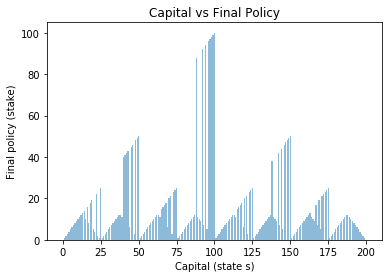

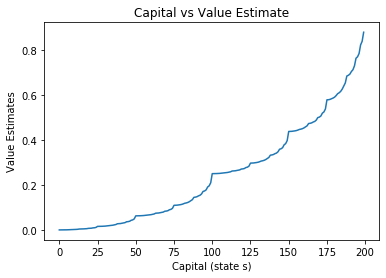

In [0]:
tnop_h = 0.25      # Probability of head in coin flip
main_function(p_h, gamma, theta, g)

Optimal policy:
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0.]
     State  Value function  Policy output
0        0        0.000000            0.0
1        1        0.570767            1.0
2        2        0.815473            1.0
3        3        0.920439            1.0
4        4        0.965507            1.0
..     ...             ...            ...
196    196        1.000000            1.0
197    197        1.000000         

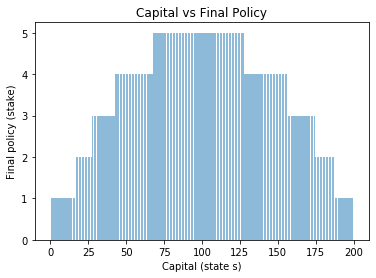

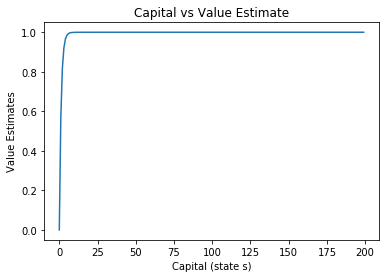

In [0]:
p_h = 0.7
main_function(p_h, gamma, theta, g)

Optimal policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.  1.  1.  1. 16. 17.
 18. 19. 20. 21. 22.  1.  8.  9. 10. 27. 28. 29.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  3.  4. 41. 42. 43. 44.  9. 10. 11. 32. 33. 36. 37. 52. 53.
 46. 45. 44. 43. 44. 45. 46. 47. 18. 19. 20. 21. 22. 33. 32. 31. 30. 29.
 28. 29. 30. 31. 32.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  2.  3.  4.  5.  5.  4.  3.  2.  1.  2.  1.  2.  1.  2.  1.  2.  1.
  2.  1.  2.  1.  4.  1.  6.  1.  8.  1. 10.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  1.  2.  1.  2.  1.  2.  1.  2.
  1.  4.  1.  6.  1.  8.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  2.  1.  2.  1.  2.  1.  2.  1.  2.  1.  4.  1.  6.  1.  1.  1.  1.  1.
  1.  1.  1.  2.  1.  2.  1.  2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.]
     State  Value function  Policy output
0        0           0.000            0.0
1        1           0.005            1.0
2        2           0.010            2.0

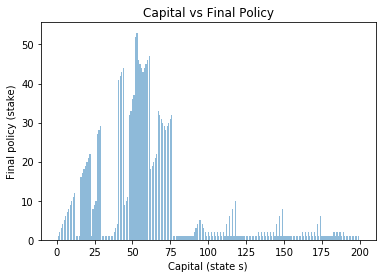

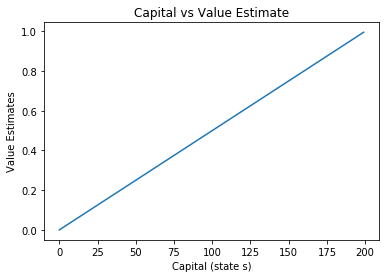

In [0]:
p_h = 0.5
main_function(p_h, gamma, theta, g)